In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

# Display first five rows
print(data.head())

# Get dataset summary
print(data.info())

# Statistical summary
print(data.describe())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


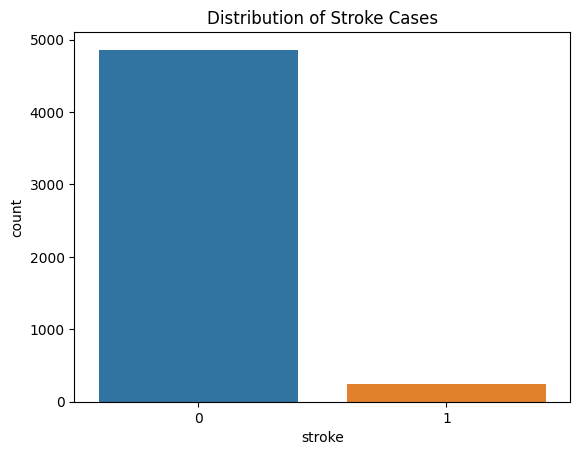

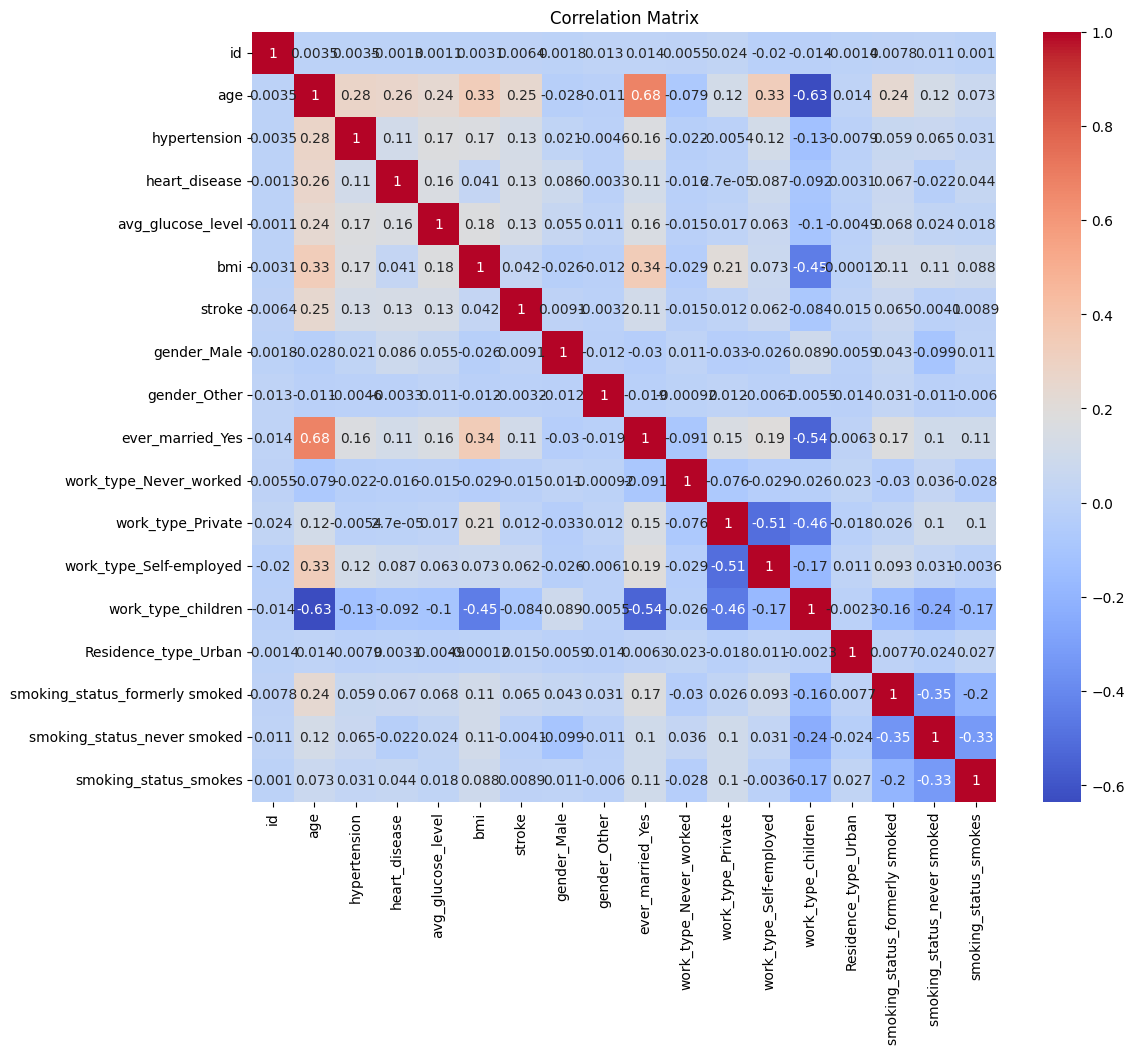

In [3]:
# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='stroke', data=data)
plt.title('Distribution of Stroke Cases')
plt.show()

# One-hot encode the categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Visualize the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [4]:
# Option 1: Using loc[] to fill missing values in 'bmi'
data.loc[:, 'bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Option 2: Using assign() method to fill missing values in 'bmi'
data = data.assign(bmi=data['bmi'].fillna(data['bmi'].mean()))


In [5]:
# Encoding categorical variables consistently with map
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2}).astype(int)
data['ever_married'] = data['ever_married'].map({'No': 0, 'Yes': 1}).astype(int)
data['work_type'] = data['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}).astype(int)
data['Residence_type'] = data['Residence_type'].map({'Urban': 0, 'Rural': 1}).astype(int)
data['smoking_status'] = data['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3}).astype(int)


In [6]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

# Define X (features) and y (target)
X = df.drop('stroke', axis=1)  # Assuming 'stroke' is the target variable
y = df['stroke']  # Target variable

# Handle missing values (for example, in 'bmi' column)
X['bmi'] = X['bmi'].fillna(X['bmi'].mean())

# Encode categorical variables using pd.get_dummies()
X = pd.get_dummies(X, drop_first=True)

# Now X is ready for model training
print(X.head())


      id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0   9046  67.0             0              1             228.69  36.600000   
1  51676  61.0             0              0             202.21  28.893237   
2  31112  80.0             0              1             105.92  32.500000   
3  60182  49.0             0              0             171.23  34.400000   
4   1665  79.0             1              0             174.12  24.000000   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         True         False              True                   False   
1        False         False              True                   False   
2         True         False              True                   False   
3        False         False              True                   False   
4        False         False              True                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True   

In [7]:
# Features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

Decision Tree Model

In [8]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

KNN Model

In [9]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Evaluation Evaluate all the models using classification metrics:

In [10]:
# Setting up the SVM model
svm_model = SVC(probability=True, random_state=42)

In [11]:
# Setting up the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [12]:
# Setting up the KNN model
knn_model = KNeighborsClassifier()

In [13]:
# Training the SVM model
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [14]:
# Training the Decision Tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Training the KNN model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# Predictions
svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_test, y_pred, model_name):
    print(f"\nEvaluation Metrics for {model_name}:")
    
    # Accuracy Score
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Classification Report with zero_division parameter
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()



Evaluation Metrics for Support Vector Machine:
Accuracy: 0.9510763209393346
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       1.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.98      0.50      0.49      1022
weighted avg       0.95      0.95      0.93      1022



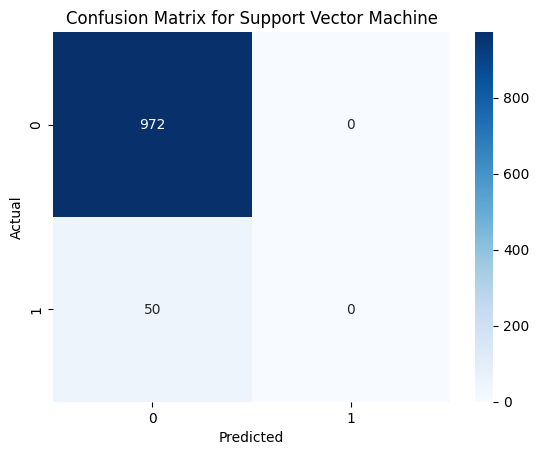

In [18]:
evaluate_model(y_test, svm_pred, 'Support Vector Machine')


Evaluation Metrics for Decision Tree:
Accuracy: 0.9090019569471625
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.15      0.18      0.16        50

    accuracy                           0.91      1022
   macro avg       0.55      0.56      0.56      1022
weighted avg       0.92      0.91      0.91      1022



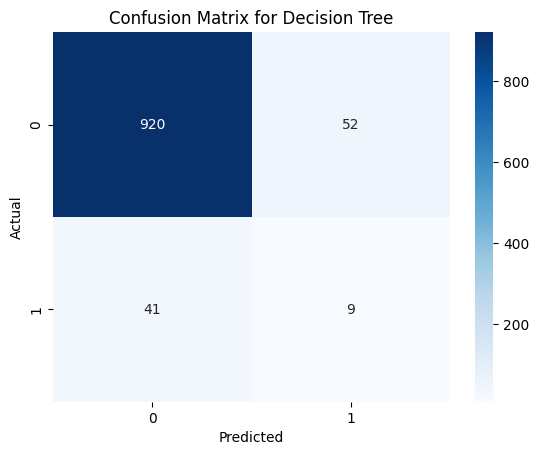

In [19]:
evaluate_model(y_test, dt_pred, 'Decision Tree')


Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.949119373776908
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



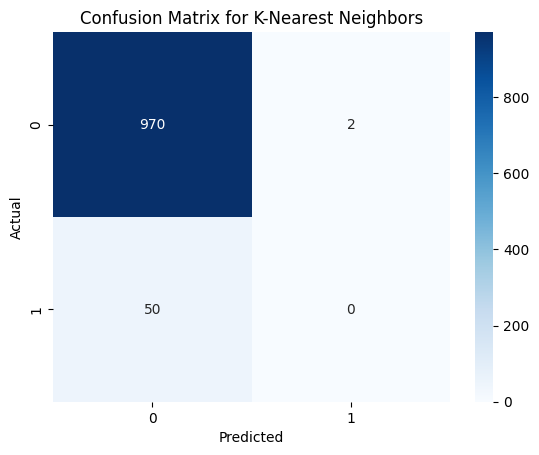

In [20]:
evaluate_model(y_test, knn_pred, 'K-Nearest Neighbors')


Evaluation Metrics for SVM after SMOTE:
Accuracy: 0.7915851272015656
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       972
           1       0.11      0.48      0.18        50

    accuracy                           0.79      1022
   macro avg       0.54      0.64      0.53      1022
weighted avg       0.93      0.79      0.85      1022



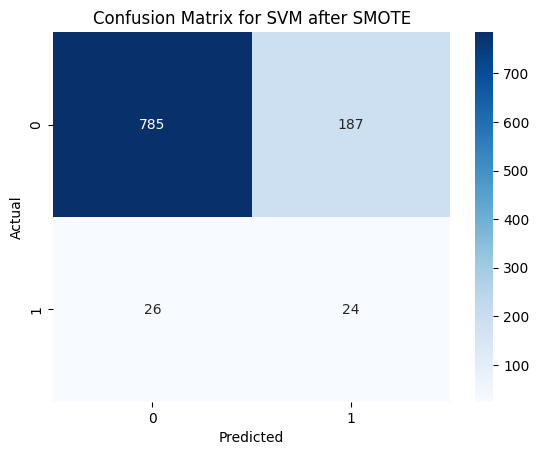


Evaluation Metrics for Decision Tree after SMOTE:
Accuracy: 0.8923679060665362
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       972
           1       0.11      0.16      0.13        50

    accuracy                           0.89      1022
   macro avg       0.53      0.55      0.53      1022
weighted avg       0.91      0.89      0.90      1022



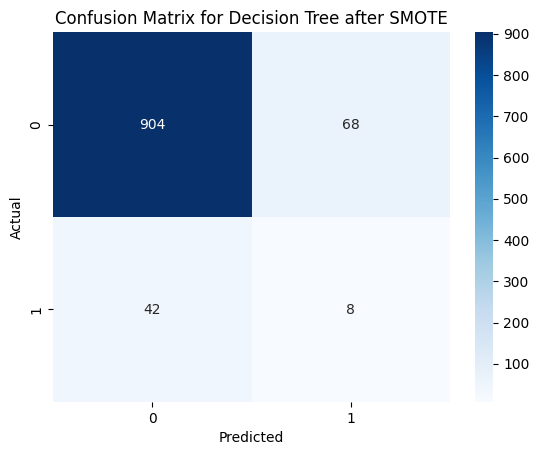


Evaluation Metrics for KNN after SMOTE:
Accuracy: 0.8023483365949119
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       972
           1       0.10      0.36      0.15        50

    accuracy                           0.80      1022
   macro avg       0.53      0.59      0.52      1022
weighted avg       0.92      0.80      0.85      1022



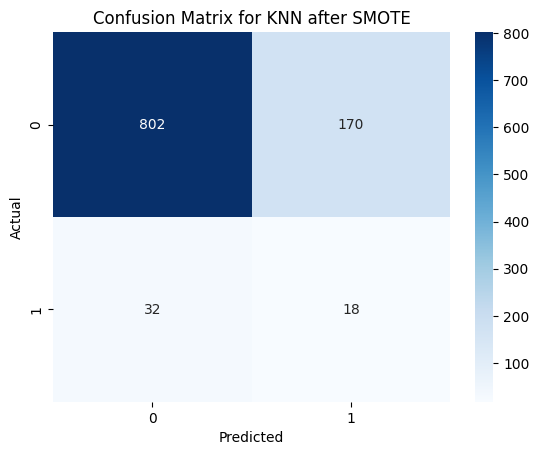

In [21]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Retrain SVM after SMOTE
svm_model.fit(X_resampled, y_resampled)
svm_pred_bal = svm_model.predict(X_test)
evaluate_model(y_test, svm_pred_bal, 'SVM after SMOTE')

# Retrain Decision Tree after SMOTE
dt_model.fit(X_resampled, y_resampled)
dt_pred_bal = dt_model.predict(X_test)
evaluate_model(y_test, dt_pred_bal, 'Decision Tree after SMOTE')

# Retrain KNN after SMOTE
knn_model.fit(X_resampled, y_resampled)
knn_pred_bal = knn_model.predict(X_test)
evaluate_model(y_test, knn_pred_bal, 'KNN after SMOTE')


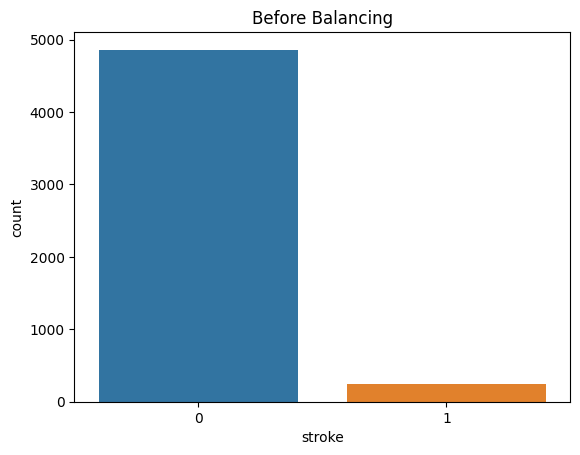

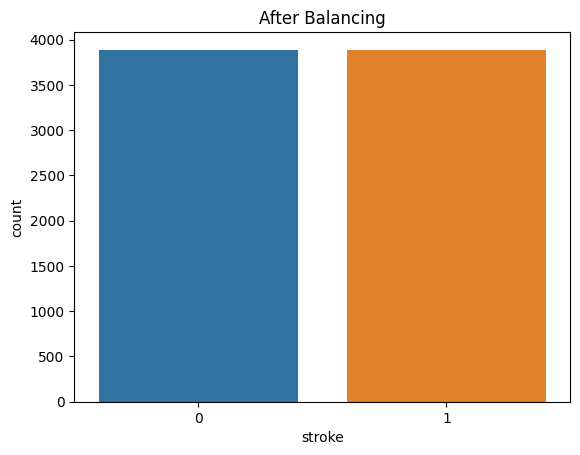

In [22]:
# Before balancing
sns.countplot(x='stroke', data=data)
plt.title('Before Balancing')
plt.show()

# Oversampling using SMOTE (Synthetic Minority Oversampling Technique)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# After balancing
sns.countplot(x=y_resampled)
plt.title('After Balancing')
plt.show()

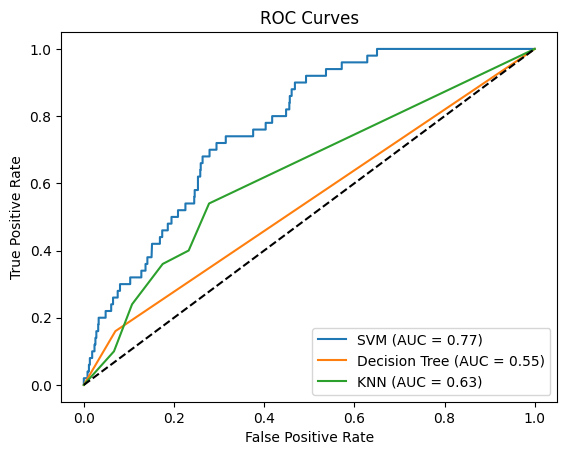

In [23]:
# ROC AUC Scores
svm_probs = svm_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]

svm_auc = roc_auc_score(y_test, svm_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

# Calculate ROC Curves
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

# Plot ROC Curves
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()